<a href="https://colab.research.google.com/github/yev34/Machine-learning/blob/main/Patalashko_lab2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1


1.Вивести перших 5 рядків.


In [ ]:
import pandas as pd

url="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables=pd.read_html(url)
df=tables[2]
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [ ]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [ ]:
current_colums=[
    ('Country/Territory','Country/Territory'),
    ('IMF[1][13]','Forecast'),
    ('IMF[1][13]','Year'),
    ('WorldBank[14]','Estimate'),
    ('WorldBank[14]','YearYear'),
    ('United Nations[15]','Estimate'),
    ('United Nations[15]', 'Year')
]

new_columns=[
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Eastimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
]
df.columns=new_columns
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Eastimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [ ]:
selected_columns={
    'IMF_Forecast':'MVF_2024',
    'WorldBank_Eastimate':'WorldBank_2023',
    'UN_Estimate':'OON_2022'

}
df1= df[['Country']+list(selected_columns.keys())]
df=df1.rename(columns=selected_columns)
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [ ]:
df.shape

(210, 4)

In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [ ]:
print("/nTипи даних кожного сTовпця:\n",df.dtypes)

/nTипи даних кожного сTовпця:
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [ ]:
df.replace('-',float('nan'),inplace=True)
df['MVF_2024 ']=pd.to_numeric(df['MVF_2024'],errors='coerce')
df['WorldBank_2023']=pd.to_numeric(df['WorldBank_2023'],errors='coerce')
df['OON_2022']=pd.to_numeric(df['OON_2022'],errors='coerce')
print("/nTипи даних после конверации:\n",df.dtypes)
df.head(10)

/nTипи даних после конверации:
 Country            object
MVF_2024           object
WorldBank_2023    float64
OON_2022          float64
MVF_2024          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022,MVF_2024
0,World,109529216,105435540.0,100834796.0,109529216.0
1,United States,28781083,27360935.0,25744100.0,28781083.0
2,China,18532633,17794782.0,17963170.0,18532633.0
3,Germany,4591100,4456081.0,4076923.0,4591100.0
4,Japan,4110452,4212945.0,4232173.0,4110452.0
5,India,3937011,3549919.0,3465541.0,3937011.0
6,United Kingdom,3495261,3340032.0,3089072.0,3495261.0
7,France,3130014,3030904.0,2775316.0,3130014.0
8,Brazil,2331391,2173666.0,1920095.0,2331391.0
9,Italy,2328028,2254851.0,2046952.0,2328028.0


In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,8
OON_2022,1
MVF_2024,15


In [ ]:
import numpy as np
df=df.replace({'-':np.NaN})
df=df.fillna(df.mean(numeric_only=True),axis=0)
df.head(5)


,Country,MVF_2024,WorldBank_2023,OON_2022,MVF_2024
0,World,109529216,105435540.0,100834796.0,109529216.0
1,United States,28781083,27360935.0,25744100.0,28781083.0
2,China,18532633,17794782.0,17963170.0,18532633.0
3,Germany,4591100,4456081.0,4076923.0,4591100.0
4,Japan,4110452,4212945.0,4232173.0,4110452.0


In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0
MVF_2024,0


8.

In [ ]:
import pandas as pd
duplicates = df.duplicated().sum()
print(f'Кількість дублікатів: {duplicates}')
df_cleaned = df.drop_duplicates()
print(df_cleaned)
df.head(5)

Кількість дублікатів: 0
              Country   MVF_2024  WorldBank_2023     OON_2022    MVF_2024 
0               World  109529216     105435540.0  100834796.0  109529216.0
1       United States   28781083      27360935.0   25744100.0   28781083.0
2               China   18532633      17794782.0   17963170.0   18532633.0
3             Germany    4591100       4456081.0    4076923.0    4591100.0
4               Japan    4110452       4212945.0    4232173.0    4110452.0
..                ...        ...             ...          ...          ...
205          Kiribati        311           279.0        223.0        311.0
206             Palau        308           263.0        225.0        308.0
207  Marshall Islands        305           284.0        279.0        305.0
208             Nauru        161           154.0        147.0        161.0
209            Tuvalu         66            62.0         59.0         66.0

[210 rows x 5 columns]


,Country,MVF_2024,WorldBank_2023,OON_2022,MVF_2024
0,World,109529216,105435540.0,100834796.0,109529216.0
1,United States,28781083,27360935.0,25744100.0,28781083.0
2,China,18532633,17794782.0,17963170.0,18532633.0
3,Germany,4591100,4456081.0,4076923.0,4591100.0
4,Japan,4110452,4212945.0,4232173.0,4110452.0


9

In [ ]:
import pandas as pd
description = df.describe(include='all')
print(description)
df.head(5)

       Country MVF_2024  WorldBank_2023      OON_2022     MVF_2024 
count      210      210    2.100000e+02  2.100000e+02  2.100000e+02
unique     210      196             NaN           NaN           NaN
top      World        —             NaN           NaN           NaN
freq         1       15             NaN           NaN           NaN
mean       NaN      NaN    1.037206e+06  9.612699e+05  1.123228e+06
std        NaN      NaN    7.602076e+06  7.275608e+06  7.900707e+06
min        NaN      NaN    6.200000e+01  5.900000e+01  6.600000e+01
25%        NaN      NaN    1.044175e+04  8.928250e+03  1.464775e+04
50%        NaN      NaN    4.341600e+04  3.210250e+04  6.215800e+04
75%        NaN      NaN    3.376592e+05  2.412485e+05  4.366365e+05
max        NaN      NaN    1.054355e+08  1.008348e+08  1.095292e+08


,Country,MVF_2024,WorldBank_2023,OON_2022,MVF_2024
0,World,109529216,105435540.0,100834796.0,109529216.0
1,United States,28781083,27360935.0,25744100.0,28781083.0
2,China,18532633,17794782.0,17963170.0,18532633.0
3,Germany,4591100,4456081.0,4076923.0,4591100.0
4,Japan,4110452,4212945.0,4232173.0,4110452.0


10 Y United States i China ці показники
найбільше відрізняються

In [ ]:
import pandas as pd
countries = ['World', 'United States	', 'China', 'Germany	', 'Japan	']
MVF_2024 = [109529216.0,28781083.0,18532633.0,4591100.0,4110452.0]
WorldBank_2023 = [105435540.0,27360935.0,17794782.0,4456081.0,4212945.0]

# Створюємо DataFrame
data = {
    'Country': countries,
    'MVF_2024': MVF_2024,
    'WorldBank_2023': WorldBank_2023
}

df = pd.DataFrame(data)


# Обчислюємо відхилення
df['Deviation'] = df['MVF_2024'] - df['WorldBank_2023']

# Визначаємо країни з найбільшим відхиленням
# Сортуємо за величиною відхилення в порядку спадання
df_sorted = df.sort_values(by='Deviation', ascending=False)

# Виводимо результати
print("Країни з найбільшим відхиленням між MVF_2024 та WorldBank_2023:")
print(df_sorted[['Country', 'Deviation']])
df.head(5)


Країни з найбільшим відхиленням між MVF_2024 та WorldBank_2023:
           Country  Deviation
0            World  4093676.0
1  United States\t  1420148.0
2            China   737851.0
3        Germany\t   135019.0
4          Japan\t  -102493.0


,Country,MVF_2024,WorldBank_2023,Deviation
0,World,109529216.0,105435540.0,4093676.0
1,United States\t,28781083.0,27360935.0,1420148.0
2,China,18532633.0,17794782.0,737851.0
3,Germany\t,4591100.0,4456081.0,135019.0
4,Japan\t,4110452.0,4212945.0,-102493.0


11

In [ ]:
import pandas as pd

correlation_matrix = df.corr()

# Виводимо кореляційну матрицю
print("Кореляційна матриця:")
print(correlation_matrix)

# Визначаємо пари змінних з найвищою кореляцією
max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]  # Видаляємо кореляцію змінної саму з собою

print("\nПари змінних з найвищою кореляцією:")
print(max_corr.head())
df.head(5)

Кореляційна матриця:
                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999987  0.999884
WorldBank_2023  0.999987        1.000000  0.999918
OON_2022        0.999884        0.999918  1.000000

Пари змінних з найвищою кореляцією:
MVF_2024        WorldBank_2023    0.999987
WorldBank_2023  MVF_2024          0.999987
                OON_2022          0.999918
OON_2022        WorldBank_2023    0.999918
MVF_2024        OON_2022          0.999884
dtype: float64


,MVF_2024,WorldBank_2023,OON_2022
Country,,,
World,109529216.0,105435540.0,100834796.0
United States\t,28781083.0,27360935.0,25744100.0
China,18532633.0,17794782.0,17963170.0
Germany\t,4591100.0,4456081.0,4076923.0
Japan\t,4110452.0,4212945.0,4232173.0


12

In [ ]:
import pandas as pd


# Обчислюємо середнє значення для кожного стовпця
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()

print("Середні значення для кожного стовпця:")
print(mean_values)

# Для порівняння змінних між роками

data_2023 = {
     'Country': ['World', 'United States	', 'China', 'Germany	', 'Japan	'],
    'MVF_2023': [109529216.0,28781083.0,18532633.0,4591100.0,4110452.0]  ,
    'WorldBank_2022': [105435540.0,27360935.0,17794782.0,4456081.0,4212945.0],
    'OON_2021': [100834796.0,25744100.0,17963170.0,4076923.0	,4232173.0]
}

df_2023 = pd.DataFrame(data_2023)

# Обчислюємо середні значення для кожного стовпця в 2023 році
mean_values_2023 = df_2023[['MVF_2023', 'WorldBank_2022', 'OON_2021']].mean()

print("\nСередні значення для кожного стовпця у 2023 році:")
print(mean_values_2023)

# Порівнюємо середні значення між роками
comparison = pd.DataFrame({
    '2024': mean_values,
    '2023': mean_values_2023
})

print("\nПорівняння середніх значень між роками:")
print(comparison)


Середні значення для кожного стовпця:
MVF_2024          33108896.8
WorldBank_2023    31852056.6
OON_2022          30570232.4
dtype: float64

Середні значення для кожного стовпця у 2023 році:
MVF_2023          33108896.8
WorldBank_2022    31852056.6
OON_2021          30570232.4
dtype: float64

Порівняння середніх значень між роками:
                      2024        2023
MVF_2023               NaN  33108896.8
MVF_2024        33108896.8         NaN
OON_2021               NaN  30570232.4
OON_2022        30570232.4         NaN
WorldBank_2022         NaN  31852056.6
WorldBank_2023  31852056.6         NaN


13

In [ ]:
import pandas as pd
df.set_index('Country', inplace=True)
std_devs = df.std(axis=1)

# Визначаємо країну з найвищою варіативністю
most_variable_country = std_devs.idxmax()
highest_variability = std_devs.max()

print("Стандартне відхилення для кожної країни:")
print(std_devs)

print(f"\nКраїна з найвищою варіативністю у показниках між роками: {most_variable_country}")
print(f"Максимальне стандартне відхилення: {highest_variability}")

Стандартне відхилення для кожної країни:
Country
World              5.972658e+07
United States\t    1.540326e+07
China              1.006758e+07
Germany\t          2.534642e+06
Japan\t            2.462465e+06
dtype: float64

Країна з найвищою варіативністю у показниках між роками: World
Максимальне стандартне відхилення: 59726577.94382535


14

In [ ]:
import pandas as pd
data = {
'Country' : ['World', 'United States	', 'China', 'Germany	', 'Japan	'],
'MVF_2024' : [109529216.0,28781083.0,18532633.0,4591100.0,4110452.0],
'WorldBank_2023' : [105435540.0,27360935.0,17794782.0,4456081.0,4212945.0],
'OON_2022':[100834796.0,25744100.0,17963170.0,4076923.0,4232173.0]
}
df = pd.DataFrame(data)

df.set_index('Country', inplace=True)

# Знаходимо країну з найвищим і найнижчим показником для кожного року
max_values = df.idxmax()
min_values = df.idxmin()

max_values = pd.DataFrame({
    'Year': df.columns,
    'Country_with_Max': max_values,
    'Max_Value': df.max()
})

min_values = pd.DataFrame({
    'Year': df.columns,
    'Country_with_Min': min_values,
    'Min_Value': df.min()
})

print("Країна з найвищими показниками для кожного року:")
print(max_values)

print("\nКраїна з найнижчими показниками для кожного року:")
print(min_values)

Країна з найвищими показниками для кожного року:
                          Year Country_with_Max    Max_Value
MVF_2024              MVF_2024            World  109529216.0
WorldBank_2023  WorldBank_2023            World  105435540.0
OON_2022              OON_2022            World  100834796.0

Країна з найнижчими показниками для кожного року:
                          Year Country_with_Min  Min_Value
MVF_2024              MVF_2024          Japan\t  4110452.0
WorldBank_2023  WorldBank_2023          Japan\t  4212945.0
OON_2022              OON_2022        Germany\t  4076923.0


15

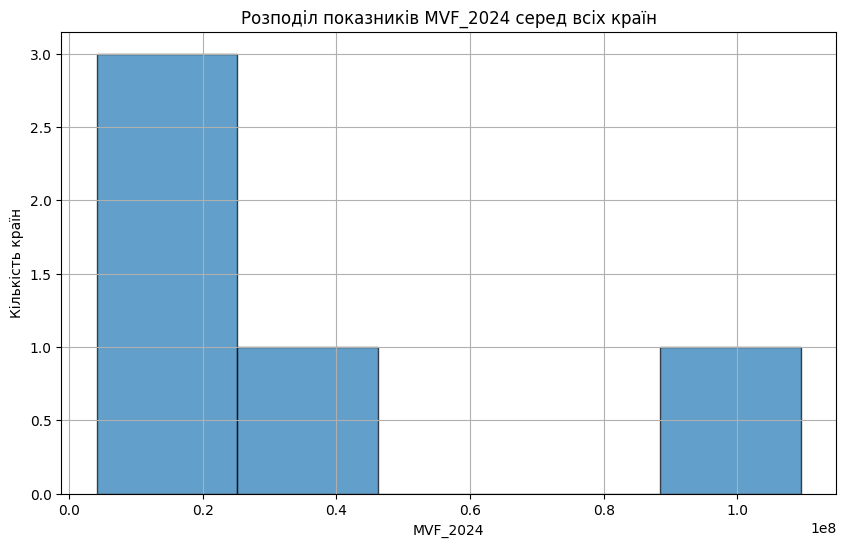

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Побудова гістограми для показників MVF_2024
plt.figure(figsize=(10, 6))
plt.hist(df['MVF_2024'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Розподіл показників MVF_2024 серед всіх країн')
plt.xlabel('MVF_2024')
plt.ylabel('Кількість країн')
plt.grid(True)

# Відображення гістограми
plt.show()


16 З часом частки країн зменшуюtьcя

In [ ]:
import pandas as pd



# Встановлюємо колонку "Country" як індекс
df.set_index('Country', inplace=True)

# Обчислюємо загальне значення для кожного року
total_values = df.sum()

# Обчислюємо частку кожної країни в загальному значенні
percentage_shares = df.divide(total_values, axis=1) * 100

print("Частка кожної країни в загальному значенні для кожного року:")
print(percentage_shares)

# Аналіз зміни часток з часом
# Порівнюємо частки між роками, наприклад, MVF_2024 і WorldBank_2023
print("\nЗміна часток між роками:")
for column in percentage_shares.columns:
    print(f"\nЧастка для {column}:")
    print(percentage_shares[[column]].sort_values(by=column, ascending=False))



Частка кожної країни в загальному значенні для кожного року:
                  MVF_2024
Country                   
World            66.163012
United States\t  17.385709
China            11.194957
Germany\t         2.773333
Japan\t           2.482989

Зміна часток між роками:

Частка для MVF_2024:
                  MVF_2024
Country                   
World            66.163012
United States\t  17.385709
China            11.194957
Germany\t         2.773333
Japan\t           2.482989


17 Які країни показують стабільне зростання або спад (дати відповідь)?
 СTабiльний спад - Chiнa i Japaн

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


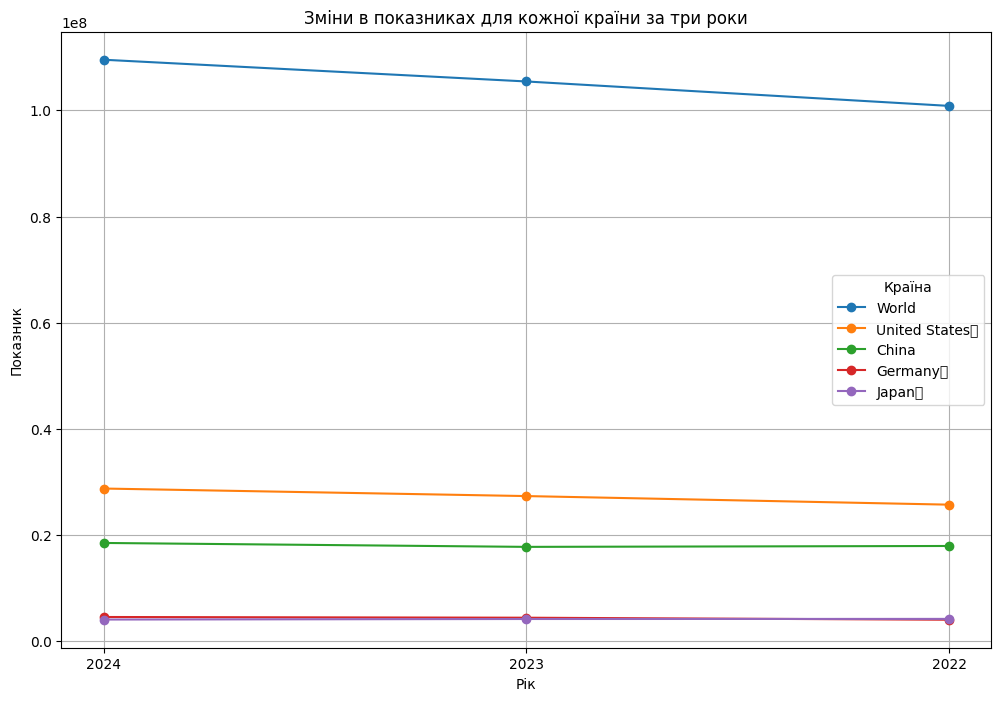

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Приклад даних
data = {
   'Country' : ['World', 'United States	', 'China', 'Germany	', 'Japan	'],
'MVF_2024' : [109529216.0,28781083.0,18532633.0,4591100.0,4110452.0],
'WorldBank_2023' : [105435540.0,27360935.0,17794782.0,4456081.0,4212945.0],
'OON_2022':[100834796.0,25744100.0,17963170.0,4076923.0,4232173.0]
}

df = pd.DataFrame(data)



# Перетворюємо дані для побудови графіка
df_melted = df.melt(id_vars=['Country'], var_name='Year', value_name='Value')

# Змінюємо рік в даних для зручності
df_melted['Year'] = df_melted['Year'].replace({
    'MVF_2024': '2024',
    'WorldBank_2023': '2023',
    'OON_2022': '2022'
})

# Побудова графіка
plt.figure(figsize=(12, 8))

for country in df['Country']:
    country_data = df_melted[df_melted['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], marker='o', label=country)

plt.title('Зміни в показниках для кожної країни за три роки')
plt.xlabel('Рік')
plt.ylabel('Показник')
plt.legend(title='Країна')
plt.grid(True)

# Відображення графіка
plt.show()


# Завдання 2

In [ ]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/My Drive/titanic.csv'
df=pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df['Age'].mean(skipna=True)

30.272590361445783

In [ ]:
df['Age'].fillna(df['Age'].median(skipna=True),inplace=True)

In [ ]:
df['Fare'].fillna(df['Fare'].value_counts().idxmax(),inplace=True)

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df=df[['Survived','Pclass	','Sex','Age','Fare']]

KeyError: "['Pclass\\t'] not in index"

In [ ]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
